In [1]:
# Mounting files on google drive which will ease file accessing 
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [2]:
# Launching tensorflow 2 and invoking GPU if available on Google Collab
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!python "/content/drive/MyDrive/REVIEWS/preprocess.py"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Instructions for updating:
Use output_signature instead
2021-08-19 10:55:11.804078: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-19 10:55:11.804149: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (2199ed675841): /proc/driver/nvidia/version does not exist
2021-08-19 10:55:12.206239: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [8]:
import pandas as pd
pd.read_pickle("/content/drive/MyDrive/REVIEWS/reviews.pickle")["review"].values

array(['Good READ MORE', 'Flashlight is very very bad READ MORE',
       'battery is too bad . READ MORE', ...,
       'Excellent product under the price of just 6k Worth every penny READ MORE',
       'Nyc products Basic user good mobile Worth for money READ MORE',
       'Good honor 9s READ MORE'], dtype=object)

In [3]:
!pip install emot

     |████████████████████████████████| 61 kB 19 kB/s 


In [15]:
!python "/content/drive/MyDrive/REVIEWS/predict.py" 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Nyc products Basic user good mobile Worth for money
[[236, 139, 590, 143, 1, 6, 58, 14]]
2021-08-19 11:50:33.315949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 11:50:33.323608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 11:50:33.324475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read 

In [14]:
!python "/content/drive/MyDrive/REVIEWS/training.py" 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Instructions for updating:
Use output_signature instead
2021-08-19 11:49:41.102706: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 11:49:41.111047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 11:49:41.111812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 11:49:41.113373: I tensorflow/strea

In [ ]:
#data generating
import os
import io
import pickle
from nltk.corpus import stopwords
import emot
import os
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import FastText 
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,Concatenate,TimeDistributed,Masking,GRU,Input,Dot,Reshape,Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
from gensim.models import FastText 
from random import seed
from random import randint
from sklearn.cluster import KMeans
DATA_PATH="/content/drive/My Drive/REVIEWS/"
raw_file="reviews.pickle"
preprocessed_file="preprocessed_df.pickle"
trained_embeddings="trained_embeddings"
padded_seqfile="padded_sequences.pickle"
tokenfile="token.pickle"
train_again=True
vocabtrain_again=False
stopword=stopwords.words(fileids="english")
embed_outputdim=100
aspects_k=10 #number of aspects
buffer_size=1024
batch_size=100
negative_samples=20
WEIGHTS_PATH="/content/drive/My Drive/abae_logs/checkpoints/abae/trainfrom/WeightsV5"
weight_path="/content/drive/My Drive/abae_logs/checkpoints/abae/trainfrom/WeightsV5/weights_epoch_15"
CHECKPOINTS_PATH="/content/drive/My Drive/REVIEWS/checkpointsV5"
lr=0.001
iterations=15
return_bestweightspath=True
lamda=0.5
MODEL_CONFIG = {'embed_outputdim': embed_outputdim,
                  'aspects_k' : aspects_k}
with io.open(os.path.join(DATA_PATH,"padded_sequences.pickle"),"rb") as file:
  seq_texts=pickle.load(file)
from random import seed
from random import randint

def embedding_layerinit():
  model=training_vocab(embed_dim=embed_outputdim,negative_sampling=5,min_count=1,window=10,iter=250,sg=1,train_again=vocabtrain_again,return_model=True)
  trained_weights=np.vstack((np.zeros((1,100)),model.wv.vectors))
  return trained_weights,model

def inputlength():
  seq=textinputsequence_padding(padding="post",padded_seqagain=train_again,return_paddedsequences=True)
  return seq.shape[1]


def convert_emojis(review):
  for x in review:
    if x in emot.emo_unicode.UNICODE_EMOJI.keys():
      review=review.replace(x,"")
  return review

#Converting all the extra spaces into single space. This will help while splitting the data in the future.
def removecharacters(review):
  review= re.sub('[^A-Za-z0-9]+',' ',review)  #anything exept numbers and alphabets, replace them with space
  review=re.sub(r"\n"," ",review)  #new lines into space
  review=re.sub(r"\t"," ",review)  #tabs into space
  review=re.sub(r"\v"," ",review)  #vertical tab into space
  review=re.sub(r"\s"," ",review)   #all extra spaces into single space
  return review.lower()
  
def removenewords(review,wordcountdict):
  return " ".join([word for word in review.split(" ") if  word in list(wordcountdict.keys())])

def removestopwords(review,stopword):
  return " ".join([word for word in review.split(" ") if not word in stopword])

def word_count(review,wordcountdict,min_word_repeat):
  return  " ".join([word for word in review.split() if wordcountdict[word]>min_word_repeat] )



def text_processing(stopword=stopword,min_word_repeat=10,sent_len_percentile=99.9,dump_aspickle=True,return_df=False):
  #stop_words=set(stopwords.words('english'))
  raw_path=os.path.join(DATA_PATH,raw_file)
  preprocessed_path=os.path.join(DATA_PATH,preprocessed_file)
  if os.path.isfile(preprocessed_path):
    preprocessed_df=pd.read_pickle(preprocessed_path)
  else:
    df = pd.read_pickle(raw_path)
    df["review"]=df["review"].apply(lambda x:x.strip("READ MORE").lower())
    df["review"]=df["review"].apply(convert_emojis)
    df["review"]=df["review"].apply(decontractions)
    df["review"]=df["review"].apply(removecharacters)
    df["review"]=pd.DataFrame(df["review"].apply(lambda x:removestopwords(x,stopword)))
    df["len"]=df.review.str.split().apply(len)
    l=np.percentile(df.len,sent_len_percentile)
    df=df.loc[(df["len"]>0) & (df["len"]<l+1)]
    tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n') #tensorflow tokenising
    tkn.fit_on_texts(df['review'].values)
    word_countdict=tkn.word_counts  #word count dictionary
    df["review"]=pd.DataFrame(df["review"].apply(lambda x:word_count(x,word_countdict,min_word_repeat)))
    df["len"]=df.review.str.split(" ").apply(len)
    if  dump_aspickle:
      with open(preprocessed_path,"wb") as file:
        pickle.dump(df.loc[df["len"]>0],file)
    preprocessed_df=df.loc[df["len"]>0]
  if return_df:
    return preprocessed_df


def tokenisation_on_traindata(return_tkn=True):
  if os.path.isfile(os.path.join(DATA_PATH,preprocessed_file)):
    train=pd.read_pickle(os.path.join(DATA_PATH,preprocessed_file))
  else:
    train=text_processing(stopword=stopword,min_word_repeat=10,sent_len_percentile=99.9,dump_aspickle=True,return_df=True)
  tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n') #tensorflow tokenising
  tkn.fit_on_texts(train['review'].values)
  with io.open(os.path.join(DATA_PATH,"token.pickle"),"wb") as file:
    pickle.dump(tkn,file)
  if return_tkn:
    return tkn


def training_vocab(embed_dim=100,negative_sampling=5,min_count=1,window=10,iter=250,sg=1,train_again=vocabtrain_again,return_model=True):
  preprocessed_path=os.path.join(DATA_PATH,preprocessed_file)
  if os.path.isfile(preprocessed_path):
    df=pd.read_pickle(preprocessed_path)
  else:
    df=text_processing(stopword=set(stopwords.words('english')),return_df=True)
  tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
  tkn.fit_on_texts(df['review'].values)
  word_countdict=tkn.word_counts
  seq_texts=tkn.texts_to_sequences(df['review'].values)  #converting tokenised reviews into sequence of
# integers with each integer corresponding to one word in the corpus
  text=pd.Series(df['review'].values).apply(lambda x: x.split())  #spliting the reviews in a format suitable to  feed 
#into Fasttext for trainig vocab 

  trained_embeddings_path=os.path.join(DATA_PATH,trained_embeddings)
  if os.path.isfile(trained_embeddings_path):
    if train_again:
      model = FastText(size=embed_dim, negative=negative_sampling, min_count=min_count,window=window,iter=iter,sg=sg) 
      model.build_vocab(text) 
      gensim_fasttext = model.train(sentences=text, 
                           sg=sg, ##skipgram
                           epochs=iter, ##no of iterations
                           size=embed_dim, ##dimentions of word embedding
                           seed=1,
                           total_examples=model.corpus_count)
      model.save(trained_embeddings_path)
    else:
      model=FastText.load(trained_embeddings_path)
  else:
    model = FastText(size=embed_dim, negative=negative_sampling, min_count=min_count,window=window,iter=iter,sg=sg) 
    model.build_vocab(text)
    gensim_fasttext = model.train(sentences=text, 
                           sg=sg, ##skipgram
                           epochs=iter, ##no of iterations
                           size=embed_dim, ##dimentions of word embedding
                           seed=1,
                           total_examples=model.corpus_count)
    model.save(trained_embeddings_path)
  
  
  if return_model:
    return model

def textinputsequence_padding(padding="post",padded_seqagain=train_again,return_paddedsequences=True):
  preprocessed_path=os.path.join(DATA_PATH,preprocessed_file)
  padded_seqpath=os.path.join(DATA_PATH,padded_seqfile)
  if os.path.isfile(preprocessed_path):
    df=pd.read_pickle(preprocessed_path)
  else:
    df=text_processing(stopword=set(stopwords.words('english')),return_df=True)
  if os.path.isfile(padded_seqpath):

    if padded_seqagain:
      tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
      tkn.fit_on_texts(df['review'].values)
      word_countdict=tkn.word_counts
      seq_texts=tkn.texts_to_sequences(df['review'].values)
      seq_texts=tf.keras.preprocessing.sequence.pad_sequences(seq_texts,
                                                         maxlen=max(df.len),
                                                         padding=padding)
      with open(os.path.join(DATA_PATH,"padded_sequences.pickle"),"wb") as file:
        pickle.dump(seq_texts,file)
    else:
      with open(padded_seqpath,"rb") as file:
        seq_texts=pickle.load(file)
  else:
    tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
    tkn.fit_on_texts(df['review'].values)
    word_countdict=tkn.word_counts
    seq_texts=tkn.texts_to_sequences(df['review'].values)
    seq_texts=tf.keras.preprocessing.sequence.pad_sequences(seq_texts,
                                                         maxlen=max(df.len),
                                                         padding=padding)
    with open(os.path.join(DATA_PATH,"padded_sequences.pickle"),"wb") as file:
      pickle.dump(seq_texts,file)
    with open(os.path.join(DATA_PATH,"maxlen.pickle"),"wb") as file:
      pickle.dump(seq_texts.shape[1],file)

  if return_paddedsequences:
    return seq_texts


def generate_dataset(buffer_size=buffer_size,batch_size=batch_size,negative_samples=negative_samples):
  if  os.path.isfile(os.path.join(DATA_PATH,padded_seqfile)):
    with io.open(os.path.join(DATA_PATH,"padded_sequences.pickle"),"rb") as file:
      seq_texts=pickle.load(file)
  else:
    seq_texts=textinputsequence_padding(padding="post",padded_seqagain=train_again,return_paddedsequences=True)

  def gendata():
    seed(42)
    for i in range(0,len(seq_texts)):
      lis=[]
      lent=[]
      while len(lent)<negative_samples:
        value = randint(0, len(seq_texts)-1)
        if value==i:
          continue
        lis.append(seq_texts[value])
        lent.append(value)
      yield seq_texts[i],lis
  dataset=tf.data.Dataset.from_generator(gendata, output_types=(tf.int32,tf.int32))
  dataset=dataset.repeat(1).shuffle(buffer_size=buffer_size).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
  return dataset
def aspectlayer_weightinit():
  trained_weights=embedding_layerinit()[0]
  kmeans = KMeans(n_clusters=aspects_k,random_state=0,max_iter=500,n_jobs=-1).fit(trained_weights) #clustering the trained wordembeddings into 10 clusters
  init=tf.constant_initializer(kmeans.cluster_centers_) #used for initialing the weights of final dense layer
  return init

class Attention(tf.keras.layers.Layer):
    def __init__(self):
      super().__init__()
      #self.embed_outputdim=embed_outputdim
      self.soft = tf.keras.layers.Softmax(axis=-2,name="softmax_att") #softmax layer
      self.dot=tf.keras.layers.Dot(axes=(-1,-1),name="dot_att")       #dot layer
      self.w = tf.Variable(
            initial_value=tf.random_normal_initializer()(shape=(embed_outputdim,embed_outputdim), dtype="float32"),
            trainable=True,
        )              #weights that captures essense between the word embedding and global context vector(or average of all the word embedding of the sentence)
  
    def call(self,embed_output, mask=None):

      ys = tf.reduce_mean(embed_output,axis=-2) #average of all word embeddings of the sentence
      ys=tf.expand_dims(ys,axis=-2)
      eW=tf.matmul(embed_output, self.w)
      eW = eW * tf.expand_dims(tf.cast(mask,tf.float32),-1) #maskpropagation. Preventing masked elements into calculations
      f=self.dot([eW, ys])
      f = f+tf.expand_dims(tf.cast(tf.math.equal(mask, False), f.dtype)*-1e9,-1) #multiplying all the masked elements by -1e9 so that the softmax step do not impact the vectors
      f=self.soft(f)
      zs=tf.math.reduce_sum(f*embed_output,axis=-2) #zs is aspect embedding space after attention mechanisms on words of the sentence
                                                    # f - softmax - gives info about unimportant words in the sentence for extracting aspects 
      
      return zs,f
    @classmethod
    def from_config(cls, config):
      return cls(**config)


# custom model

class model_(tf.keras.Model):
  def __init__(self,embed_outputdim,aspects_k):
    super().__init__()
    self.embed_inputdim=len(embedding_layerinit()[1].wv.vocab)
    self.inputlength=inputlength()
    self.embed_outputdim=embed_outputdim
    self.trained_weights=embedding_layerinit()[0]
    self.embedding=Embedding(input_dim=self.embed_inputdim+1,output_dim=self.embed_outputdim,mask_zero=True,
                             input_length=self.inputlength,weights=[self.trained_weights],name="embedding_layer",trainable=True) #embedding layer. Zero masking
    self.attention=Attention()
    self.aspects_k=aspects_k #number of aspects
    self.init=aspectlayer_weightinit()
    self.k = tf.keras.layers.Dense(aspects_k,name="dim_reduction_layer",activation="sigmoid")
    self.dense= self.trained_weights.shape[1]
    self.final=tf.keras.layers.Dense(self.dense,name="final_dense",kernel_initializer=self.init) #weights are initialised with embedding clusters
  def call(self,input):
    e=self.embedding(input[0])
    mask = self.embedding.compute_mask(input[0]) #computing mask so that this this can be used while propagating mask for subsequent layers
    zs=self.attention(e, mask = mask)[0] #aspect vector
    pt=self.k(zs)  #dimensionality vector
    rs=self.final(pt) #reconstructed vector

    # building regulariser to be used in the loss. [(T*transpose(T))-I]
    reg=tf.tensordot(tf.linalg.normalize(self.final.weights[0],axis=1)[1],tf.linalg.normalize(self.final.weights[0],axis=1)[1],axes=[[1],[1]])
    reg=reg-tf.ones([self.aspects_k,self.aspects_k])
    reg=tf.norm(reg, ord='euclidean', axis=None, keepdims=None, name=None)
    # calculating loss
    r=tf.expand_dims(rs,-2)
    f=tf.tensordot(rs,zs,[[0,1],[0,1]])
    a=self.embedding(input[1])
    a=tf.reduce_mean(a,axis=-2)
    loss=tf.reduce_sum(tf.nn.relu(1-tf.reduce_sum(tf.tensordot(a,r,[[0,2],[0,2]]))+f))+lamda*reg #this is the loss which is to be minimised
    return loss,pt,rs 
    
    
  def get_config(self):
    config = {
                  'embed_outputdim': self.embed_outputdim,
                  'aspects_k' : self.aspects_k}
    return config
  @classmethod
  def from_config(cls, config):
    return cls(**config)
def gendata():
  seed(42)
  for i in range(0,len(seq_texts)):
    lis=[]
    lent=[]
    while len(lent)<20:
      value = randint(0, len(seq_texts)-1)
      if value==i:
        continue
      lis.append(seq_texts[value])
      lent.append(value)

    yield seq_texts[i],lis
datagen=tf.data.Dataset.from_generator(gendata, output_types=(tf.int32,tf.int32))
datagen=datagen.repeat(1).shuffle(buffer_size=1024).batch(100).prefetch(tf.data.experimental.AUTOTUNE)
import io
for i in datagen.take(1):
  k=i
test=model_(embed_outputdim,aspects_k)
_=test(i)
test.load_weights(weight_path)
topics=test.weights[4].numpy()
topic_words={}
k=1
from gensim.models import FastText
model=FastText.load("/content/drive/My Drive/REVIEWS/trained_embeddings") #reusing already trained model
for i in range(len(topics)):
  topic_words["Aspect_"+str(k)]=np.argsort(model.wv.cosine_similarities(topics[i],model.wv.vectors))[::-1][0:50]
  k=k+1
pd.DataFrame(topic_words).applymap(lambda x:model.wv.index2word[x])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Aspect_1,Aspect_2,Aspect_3,Aspect_4,Aspect_5,Aspect_6,Aspect_7,Aspect_8,Aspect_9,Aspect_10
0,rs,playing,cameras,notifications,nice,far,thin,ke,delivered,amazing
1,offer,played,captures,messages,good,really,body,hai,deliver,loving
2,price,gaming,camera,app,osm,think,handy,liye,order,terms
3,discount,runs,images,exit,nyc,trust,fits,bhi,assured,obviously
4,deal,games,shots,apps,xilent,actually,feels,h,cancel,great
5,bought,medium,depth,disable,happy,aspects,slim,hota,delivery,s9
6,billion,heavy,portrait,whatsapp,awesome,comparison,beautiful,nhi,promised,absolutely
7,sale,performance,pictures,function,super,believe,case,jyada,ekart,brilliant
8,diwali,pubg,wide,restart,love,one,bigger,ki,seller,beast
9,12000,extreme,rear,menu,also,compared,compact,acha,item,outstanding


In [ ]:
pd.DataFrame(topic_words).applymap(lambda x:model.wv.index2word[x]).to_csv(os.path.join(DATA_PATH,"V5_topics.csv")) 

In [ ]:
for i in datagen.take(10):
  k=i

In [ ]:
l=test.layers   
l[1]

In [ ]:
k=k[0][0]

In [ ]:
k=k.numpy().reshape(1,223)

In [ ]:
endsample=l[0](k)
mask=l[0].compute_mask(k)
att=l[1](endsample,mask)[0]  


In [ ]:
boole=(np.sort(l[2](att)[0].numpy())[::-1]>0.5)*1


In [ ]:
final=list((np.argsort(l[2](att)[0].numpy())[::-1]+1)*boole)
final=[x for x in final if x!=0]
final

[2, 9, 4, 6]

In [ ]:
[x for x in final if x!=0]

[2, 9, 4, 6]

In [ ]:
np.argwhere(np.argsort(l[2](att)[0].numpy()>0.5).reshape(-1)

array([0, 1, 8])

In [ ]:
l[2](att).numpy()>0.5

array([[ True,  True, False, False, False, False, False, False,  True,
        False]])

In [ ]:
topic_num=np.argmax(l[2](att))+1

In [ ]:
!pip install emot

     |████████████████████████████████| 61 kB 18 kB/s 


In [ ]:
%%writefile /content/drive/MyDrive/REVIEWS/app.py
from flask import Flask
from flask import request
from flask import jsonify
from predict import *


app = Flask(__name__)

@app.route('/correct', methods=['GET'])
def aspect():
    try:
        text = request.args.get('text')
        results = inf_predict.topicpredict(text)
    except Exception as error:
        results = 'Unexpected error: {}'.format(error)
    out = {'input_sentence':text, 'correct_sent':results}
    out = jsonify(out)
    return out

if __name__ == '__main__':
    app.run()

Overwriting /content/drive/MyDrive/REVIEWS/app.py


In [ ]:
%%writefile /content/drive/MyDrive/REVIEWS/predict.py
import emot
import os
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import FastText 
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,Concatenate,TimeDistributed,Masking,GRU,Input,Dot,Reshape,Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Using NLTK for PoS tagging and Stopwords removal
# Downloading the corresponding packages
import pickle
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
from gensim.models import FastText 
from random import seed
from random import randint
from sklearn.cluster import KMeans
from config import *
from model import model_
from preprocess import *
from training import *



with io.open(os.path.join(DATA_PATH,padded_seqfile),"rb") as file:
  maxlen=pickle.load(file).shape[1]
topicpredict(testsample,weight_path,model_,MODEL_CONFIG,maxlen=223):  
  df=pd.DataFrame([testsample],columns=["review"])
  df["review"]=df["review"].apply(lambda x:x.strip("READ MORE").lower())
  df["review"]=df["review"].apply(convert_emojis)
  df["review"]=df["review"].apply(decontractions)
  df["review"]=df["review"].apply(removecharacters)
  df["review"]=pd.DataFrame(df["review"].apply(lambda x:removestopwords(x,stopword)))
  df["len"]=df.review.str.split().apply(len)
  df=df.loc[(df["len"]>0) & (df["len"]<maxlen+1)]
  tkn=tokenisation_on_traindata(return_tkn=True)
  word_countdict=tkn.word_counts  #word count dictionary
  df["review"]=pd.DataFrame(df["review"].apply(lambda x:removenewords(x,word_countdict)))
  df["review"]=pd.DataFrame(df["review"].apply(lambda x:word_count(x,word_countdict,10)))
  
  seq_texts=tkn.texts_to_sequences(df['review'].values)
  print(seq_texts)
  seq_texts=tf.keras.preprocessing.sequence.pad_sequences(seq_texts,
                                                         maxlen=maxlen,
                                                         padding='post')


  k=tf.random.uniform(shape=[100,223],minval=1,maxval=38,dtype=tf.int32),tf.random.uniform(shape=[100,20,223],minval=1,maxval=38,dtype=tf.int32)
  inf=model_.from_config(MODEL_CONFIG)
  inf(k)
  inf.load_weights(weight_path)
  l=inf.layers
  sample=seq_texts.reshape(1,maxlen)
  endsample=l[0](sample)
  mask=l[0].compute_mask(sample)
  att=l[1](endsample,mask)[0]  
  topic_num=np.argmax(l[2](att))+1
  return "belongs to topic_"+str(topic_num),l[2](att)


Overwriting /content/drive/MyDrive/REVIEWS/predict.py


In [ ]:
#%%writefile /content/drive/MyDrive/REVIEWS/preprocess.py
# importing necessary modules
!pip install emot
import emot
import os
import matplotlib.pyplot as plt

# import seaborn as sns
import pandas as pd
from gensim.models import FastText 
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,Concatenate,TimeDistributed,Masking,GRU,Input,Dot,Reshape,Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Using NLTK for PoS tagging and Stopwords removal
# Downloading the corresponding packages
import pickle
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
from gensim.models import FastText 
from random import seed
from random import randint
from sklearn.cluster import KMeans

from nltk.corpus import stopwords



#  removing some of the common contractions.
def decontractions(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    return phrase

def convert_emojis(review):
  for x in review:
    if x in emot.emo_unicode.UNICODE_EMOJI.keys():
      review=review.replace(x,"")
  return review

#Converting all the extra spaces into single space. This will help while splitting the data in the future.
def removecharacters(review):
  review= re.sub('[^A-Za-z0-9]+',' ',review)  #anything exept numbers and alphabets, replace them with space
  review=re.sub(r"\n"," ",review)  #new lines into space
  review=re.sub(r"\t"," ",review)  #tabs into space
  review=re.sub(r"\v"," ",review)  #vertical tab into space
  review=re.sub(r"\s"," ",review)   #all extra spaces into single space
  return review.lower()

def removenewords(review,wordcountdict):
  return " ".join([word for word in review.split(" ") if  word in list(wordcountdict.keys())])

def removestopwords(review,stopword):
  return " ".join([word for word in review.split(" ") if not word in stopword])

def word_count(review,wordcountdict,min_word_repeat):
  return  " ".join([word for word in review.split() if wordcountdict[word]>min_word_repeat] )



def text_processing(stopword=stopword,min_word_repeat=10,sent_len_percentile=99.9,dump_aspickle=True,return_df=False):
  #stop_words=set(stopwords.words('english'))
  raw_path=os.path.join(DATA_PATH,raw_file)
  preprocessed_path=os.path.join(DATA_PATH,preprocessed_file)
  if os.path.isfile(preprocessed_path):
    preprocessed_df=pd.read_pickle(preprocessed_path)
  else:
    df = pd.read_pickle(raw_path)
    df["review"]=df["review"].apply(lambda x:x.strip("READ MORE").lower())
    df["review"]=df["review"].apply(convert_emojis)
    df["review"]=df["review"].apply(decontractions)
    df["review"]=df["review"].apply(removecharacters)
    df["review"]=pd.DataFrame(df["review"].apply(lambda x:removestopwords(x,stopword)))
    df["len"]=df.review.str.split().apply(len)
    l=np.percentile(df.len,sent_len_percentile)
    df=df.loc[(df["len"]>0) & (df["len"]<l+1)]
    tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n') #tensorflow tokenising
    tkn.fit_on_texts(df['review'].values)
    word_countdict=tkn.word_counts  #word count dictionary
    df["review"]=pd.DataFrame(df["review"].apply(lambda x:word_count(x,word_countdict,min_word_repeat)))
    df["len"]=df.review.str.split(" ").apply(len)
    if  dump_aspickle:
      with io.open(preprocessed_path,"wb") as file:
        pickle.dump(df.loc[df["len"]>0],file)
    preprocessed_df=df.loc[df["len"]>0]
  if return_df:
    return preprocessed_df


def tokenisation_on_traindata(return_tkn=True):
  if os.path.isfile(os.path.join(DATA_PATH,preprocessed_file)):
    train=pd.read_pickle(os.path.join(DATA_PATH,preprocessed_file))
  else:
    train=text_processing(stopword=stopword,min_word_repeat=10,sent_len_percentile=99.9,dump_aspickle=True,return_df=True)
  tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n') #tensorflow tokenising
  tkn.fit_on_texts(train['review'].values)
  with io.open(os.path.join(DATA_PATH,"token.pickle"),"wb") as file:
    pickle.dump(tkn,file)
  if return_tkn:
    return tkn


def training_vocab(embed_dim=100,negative_sampling=5,min_count=1,window=10,iter=250,sg=1,train_again=vocabtrain_again,return_model=True):
  preprocessed_path=os.path.join(DATA_PATH,preprocessed_file)
  if os.path.isfile(preprocessed_path):
    df=pd.read_pickle(preprocessed_path)
  else:
    df=text_processing(stopword=set(stopwords.words('english')),return_df=True)
  tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
  tkn.fit_on_texts(df['review'].values)
  word_countdict=tkn.word_counts
  seq_texts=tkn.texts_to_sequences(df['review'].values)  #converting tokenised reviews into sequence of
# integers with each integer corresponding to one word in the corpus
  text=pd.Series(df['review'].values).apply(lambda x: x.split())  #spliting the reviews in a format suitable to  feed 
#into Fasttext for trainig vocab 

  trained_embeddings_path=os.path.join(DATA_PATH,trained_embeddings)
  if os.path.isfile(trained_embeddings_path):
    if train_again:
      model = FastText(size=embed_dim, negative=negative_sampling, min_count=min_count,window=window,iter=iter,sg=sg) 
      model.build_vocab(text) 
      gensim_fasttext = model.train(sentences=text, 
                           sg=sg, ##skipgram
                           epochs=iter, ##no of iterations
                           size=embed_dim, ##dimentions of word embedding
                           seed=1,
                           total_examples=model.corpus_count)
      model.save(trained_embeddings_path)
    else:
      model=FastText.load(trained_embeddings_path)
  else:
    model = FastText(size=embed_dim, negative=negative_sampling, min_count=min_count,window=window,iter=iter,sg=sg) 
    model.build_vocab(text)
    gensim_fasttext = model.train(sentences=text, 
                           sg=sg, ##skipgram
                           epochs=iter, ##no of iterations
                           size=embed_dim, ##dimentions of word embedding
                           seed=1,
                           total_examples=model.corpus_count)
    model.save(trained_embeddings_path)
  
  
  if return_model:
    return model

def textinputsequence_padding(padding="post",padded_seqagain=train_again,return_paddedsequences=True):
  preprocessed_path=os.path.join(DATA_PATH,preprocessed_file)
  padded_seqpath=os.path.join(DATA_PATH,padded_seqfile)
  if os.path.isfile(preprocessed_path):
    df=pd.read_pickle(preprocessed_path)
  else:
    df=text_processing(stopword=set(stopwords.words('english')),return_df=True)
  if os.path.isfile(padded_seqpath):

    if padded_seqagain:
      tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
      tkn.fit_on_texts(df['review'].values)
      word_countdict=tkn.word_counts
      seq_texts=tkn.texts_to_sequences(df['review'].values)
      seq_texts=tf.keras.preprocessing.sequence.pad_sequences(seq_texts,
                                                         maxlen=max(df.len),
                                                         padding=padding)
      with io.open(os.path.join(DATA_PATH,"padded_sequences.pickle"),"wb") as file:
        pickle.dump(seq_texts,file)
    else:
      with io.open(padded_seqpath,"rb") as file:
        seq_texts=pickle.load(file)
  else:
    tkn = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
    tkn.fit_on_texts(df['review'].values)
    word_countdict=tkn.word_counts
    seq_texts=tkn.texts_to_sequences(df['review'].values)
    seq_texts=tf.keras.preprocessing.sequence.pad_sequences(seq_texts,
                                                         maxlen=max(df.len),
                                                         padding=padding)
    with io.open(os.path.join(DATA_PATH,"padded_seqfile"),"wb") as file:
      pickle.dump(seq_texts,file)

  if return_paddedsequences:
    return seq_texts


def generate_dataset(buffer_size=buffer_size,batch_size=batch_size,negative_samples=negative_samples):
  if  os.path.isfile(os.path.join(DATA_PATH,padded_seqfile)):
    with io.open(os.path.join(DATA_PATH,"padded_sequences.pickle"),"rb") as file:
      seq_texts=pickle.load(file)
  else:
    seq_texts=textinputsequence_padding(padding="post",padded_seqagain=train_again,return_paddedsequences=True)

  def gendata():
    seed(42)
    for i in range(0,len(seq_texts)):
      lis=[]
      lent=[]
      while len(lent)<negative_samples:
        value = randint(0, len(seq_texts)-1)
        if value==i:
          continue
        lis.append(seq_texts[value])
        lent.append(value)
      yield seq_texts[i],lis
  dataset=tf.data.Dataset.from_generator(gendata, output_types=(tf.int32,tf.int32))
  dataset=dataset.repeat(1).shuffle(buffer_size=buffer_size).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

     |████████████████████████████████| 61 kB 26 kB/s 
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: ignored

#### Building custom attention layer

In [ ]:
#%%writefile /content/drive/MyDrive/REVIEWS/model.py



# importing necessary modules

import emot
import os
import matplotlib.pyplot as plt

# import seaborn as sns
import pandas as pd
from gensim.models import FastText 
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,Concatenate,TimeDistributed,Masking,GRU,Input,Dot,Reshape,Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Using NLTK for PoS tagging and Stopwords removal
# Downloading the corresponding packages
import pickle
import nltk

from nltk.corpus import stopwords
import numpy as np
from gensim.models import FastText 
from random import seed
from random import randint
from sklearn.cluster import KMeans

embed_outputdim=100
aspects_k=10 #number of aspects

def embedding_layerinit():
  model=training_vocab(embed_dim=embed_outputdim,negative_sampling=5,min_count=1,window=10,iter=250,sg=1,train_again=vocabtrain_again,return_model=True)
  trained_weights=np.vstack((np.zeros((1,100)),model.wv.vectors))
  return trained_weights,model

def inputlength():
  seq=textinputsequence_padding(padding="post",padded_seqagain=train_again,return_paddedsequences=True)
  return seq.shape[1]


def aspectlayer_weightinit():
  trained_weights=embedding_layerinit()[0]
  kmeans = KMeans(n_clusters=aspects_k,random_state=0,max_iter=500,n_jobs=-1).fit(trained_weights) #clustering the trained wordembeddings into 10 clusters
  init=tf.constant_initializer(kmeans.cluster_centers_) #used for initialing the weights of final dense layer
  return init

class Attention(tf.keras.layers.Layer):
    def __init__(self):
      super().__init__()
      #self.embed_outputdim=embed_outputdim
      self.soft = tf.keras.layers.Softmax(axis=-2,name="softmax_att") #softmax layer
      self.dot=tf.keras.layers.Dot(axes=(-1,-1),name="dot_att")       #dot layer
      self.w = tf.Variable(
            initial_value=tf.random_normal_initializer()(shape=(embed_outputdim,embed_outputdim), dtype="float32"),
            trainable=True,
        )              #weights that captures essense between the word embedding and global context vector(or average of all the word embedding of the sentence)
  
    def call(self,embed_output, mask=None):

      ys = tf.reduce_mean(embed_output,axis=-2) #average of all word embeddings of the sentence
      ys=tf.expand_dims(ys,axis=-2)
      eW=tf.matmul(embed_output, self.w)
      eW = eW * tf.expand_dims(tf.cast(mask,tf.float32),-1) #maskpropagation. Preventing masked elements into calculations
      f=self.dot([eW, ys])
      f = f+tf.expand_dims(tf.cast(tf.math.equal(mask, False), f.dtype)*-1e9,-1) #multiplying all the masked elements by -1e9 so that the softmax step do not impact the vectors
      f=self.soft(f)
      zs=tf.math.reduce_sum(f*embed_output,axis=-2) #zs is aspect embedding space after attention mechanisms on words of the sentence
                                                    # f - softmax - gives info about unimportant words in the sentence for extracting aspects 
      
      return zs,f


# custom model

class model_(tf.keras.Model):
  def __init__(self,embed_outputdim,aspects_k):
    super().__init__()
    self.embed_inputdim=len(embedding_layerinit()[1].wv.vocab)
    self.inputlength=inputlength()
    self.embed_outputdim=embed_outputdim
    self.trained_weights=embedding_layerinit()[0]
    self.embedding=Embedding(input_dim=self.embed_inputdim+1,output_dim=self.embed_outputdim,mask_zero=True,
                             input_length=self.inputlength,weights=[self.trained_weights],name="embedding_layer",trainable=True) #embedding layer. Zero masking
    self.attention=Attention()
    self.aspects_k=aspects_k #number of aspects
    self.init=aspectlayer_weightinit()
    self.k = tf.keras.layers.Dense(aspects_k,name="dim_reduction_layer",activation="softmax")
    self.dense= self.trained_weights.shape[1]
    self.final=tf.keras.layers.Dense(self.dense,name="final_dense",kernel_initializer=self.init) #weights are initialised with embedding clusters
  def call(self,input):
    e=self.embedding(input[0])
    mask = self.embedding.compute_mask(input[0]) #computing mask so that this this can be used while propagating mask for subsequent layers
    zs=self.attention(e, mask = mask)[0] #aspect vector
    pt=self.k(zs)  #dimensionality vector
    rs=self.final(pt) #reconstructed vector

    # building regulariser to be used in the loss. [(T*transpose(T))-I]
    reg=tf.tensordot(tf.linalg.normalize(self.final.weights[0],axis=1)[1],tf.linalg.normalize(self.final.weights[0],axis=1)[1],axes=[[1],[1]])
    reg=reg-tf.ones([self.aspects_k,self.aspects_k])
    reg=tf.norm(reg, ord='euclidean', axis=None, keepdims=None, name=None)
    # calculating loss
    r=tf.expand_dims(rs,-2)
    f=tf.tensordot(rs,zs,[[0,1],[0,1]])
    a=self.embedding(input[1])
    a=tf.reduce_mean(a,axis=-2)
    loss=tf.reduce_sum(tf.nn.relu(1-tf.reduce_sum(tf.tensordot(a,r,[[0,2],[0,2]]))+f))+1*reg #this is the loss which is to be minimised
    return loss,pt,rs 
    
    
  def get_config(self):
    config = {
                  'embed_outputdim': self.embed_outputdim,
                  'aspects_k' : self.aspects_k}
    return config
  @classmethod
  def from_config(cls, config):
    return cls(**config)


In [ ]:
#%%writefile /content/drive/MyDrive/REVIEWS/config.py
from nltk.corpus import stopwords
DATA_PATH="/content/drive/My Drive/REVIEWS/"
raw_file="reviews.pickle"
preprocessed_file="preprocessed_df.pickle"
trained_embeddings="trained_embeddings"
padded_seqfile="padded_sequences.pickle"
train_again=True
vocabtrain_again=False
stopword=stopwords.words(fileids="english")
embed_outputdim=100
aspects_k=10 #number of aspects
buffer_size=1024
batch_size=100
negative_samples=20
WEIGHTS_PATH="/content/drive/My Drive/REVIEWS/Weights"
CHECKPOINTS_PATH="/content/drive/My Drive/REVIEWS/checkpoints"
lr=0.001
iterations=15
return_bestweightspath=True

MODEL_CONFIG = {'embed_outputdim': embed_outputdim,
                  'aspects_k' : aspects_k}


#### Building tensorflow dataset from generators

In [ ]:
def gendata():
    seed(42)
    for i in range(0,len(seq_texts)):
      lis=[]
      lent=[]
      while len(lent)<negative_samples:
        value = randint(0, len(seq_texts)-1)
        if value==i:
          continue
        lis.append(seq_texts[value])
        lent.append(value)
      yield seq_texts[i],lis
dataset=tf.data.Dataset.from_generator(gendata, output_types=(tf.int32,tf.int32))
dataset=dataset.repeat(1).shuffle(buffer_size=1024).batch(100).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
    with open(os.path.join(DATA_PATH,"padded_sequences.pickle"),"rb") as file:
      seq_texts=pickle.load(file)

In [ ]:
dataset=generate_dataset(buffer_size=1024,batch_size=100,negative_samples=20)

In [ ]:
import os
os.makedirs(os.path.join(WEIGHTS_PATH,"check.h5"))


#### Model training

In [ ]:

#%%writefile /content/drive/MyDrive/REVIEWS/training.py
import emot
import os
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import FastText 
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,Concatenate,TimeDistributed,Masking,GRU,Input,Dot,Reshape,Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Using NLTK for PoS tagging and Stopwords removal
# Downloading the corresponding packages
import pickle
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
from gensim.models import FastText 
from random import seed
from random import randint
from sklearn.cluster import KMeans
#from config import *
#from model import model_

WEIGHTS_PATH="/content/drive/My Drive/REVIEWS/Weights/"
CHECKPOINTS_PATH="/content/drive/My Drive/REVIEWS/checkpoints"

lr=0.001
iterations=1
return_bestweightspath=True 

def training(WEIGHTS_PATH,CHECKPOINTS_PATH,model_,lr=lr,iterations=iterations,return_bestweightspath=return_bestweightspath):
  abae=model_(embed_outputdim,aspects_k)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  @tf.function
  def train_step(input):
      with tf.GradientTape() as tape:
        loss = abae(input)[0]
      gradients = tape.gradient(loss, abae.trainable_variables)
      optimizer.apply_gradients(zip(gradients, abae.trainable_variables))
      return loss, gradients
  train_loss = tf.keras.metrics.Mean(name='train_loss')
##check point to save
  ckpt = tf.train.Checkpoint(optimizer=optimizer, model=abae)
  ckpt_manager = tf.train.CheckpointManager(ckpt, CHECKPOINTS_PATH, max_to_keep=3)
  
  loss_list=[]
  weights_pathlist=[]
  for k in range(0,iterations): # k - number of iterations
    counter = 0

  # navigating through each batch
    for input in dataset:
      loss_, gradients = train_step(input)
      #adding loss to train loss
      train_loss(loss_)
      counter = counter + 1
      template = '''Done {} step, Loss: {:0.6f}'''
      if counter%500==0:
        print(template.format(counter, train_loss.result()))

    loss_list.append(train_loss.result()) #appending loss after every epoch
    ckpt_save_path  = ckpt_manager.save() #checkpointing after every epoch
    X=os.path.join(WEIGHTS_PATH,"weights_epoch_"+str(k+1))
    abae.save_weights(X,save_format="h5")

    weights_pathlist.append(X)
    
    print("weights saved after epoch {}".format(k+1))
    print ('Saving checkpoint for iteration {} at {}'.format(k+1, ckpt_save_path))
    print(counter, train_loss.result())
    train_loss.reset_states()             #resetting loss after every epoch
  if return_bestweightspath:
    argminimum=np.argmin(loss_list)
    return weights_pathlist[argminimum]  
  


ModuleNotFoundError: ignored

In [ ]:
checkpoint_path="/content/drive/My Drive/REVIEWS/checkpoints"
abae=model_(embed_outputdim,aspects_k)
latest = tf.train.latest_checkpoint(checkpoint_path)
ckpt = tf.train.Checkpoint(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), model=abae)
ckpt.restore(latest)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

In [ ]:
model_.from_config(MODEL_CONFIG)

In [ ]:
inf=model_.from_config(MODEL_CONFIG)

In [ ]:
for i in generate_dataset().take(2):
  k=i

In [ ]:
inf(k)
inf.load_weights("/content/drive/My Drive/REVIEWS/trainedWEIGHTS")

In [ ]:
predict(k[0][1],"/content/drive/My Drive/REVIEWS/trainedWEIGHTS",model_,MODEL_CONFIG)

'belongs to topic_4'

In [ ]:
testsample="price is very reasonable"

In [ ]:
  tkn=tokenisation_on_traindata(return_tkn=True)
  word_countdict=tkn.word_counts 
  word_countdict.keys


<function OrderedDict.keys>

In [ ]:
%%writefile /content/drive/MyDrive/REVIEWS/predict.py
import emot
import os
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import FastText 
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,Concatenate,TimeDistributed,Masking,GRU,Input,Dot,Reshape,Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Using NLTK for PoS tagging and Stopwords removal
# Downloading the corresponding packages
import pickle
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
from gensim.models import FastText 
from random import seed
from random import randint
from sklearn.cluster import KMeans
from config import *
from model import model_
from preprocess import *
from training import *



def seq_gen(testsample,maxlen=223)  :
  df=pd.DataFrame([testsample],columns=["review"])
  df["review"]=df["review"].apply(lambda x:x.strip("READ MORE").lower())
  df["review"]=df["review"].apply(convert_emojis)
  df["review"]=df["review"].apply(decontractions)
  df["review"]=df["review"].apply(removecharacters)
  df["review"]=pd.DataFrame(df["review"].apply(lambda x:removestopwords(x,stopword)))
  df["len"]=df.review.str.split().apply(len)
  df=df.loc[(df["len"]>0) & (df["len"]<maxlen+1)]
  tkn=tokenisation_on_traindata(return_tkn=True)
  word_countdict=tkn.word_counts  #word count dictionary
  df["review"]=pd.DataFrame(df["review"].apply(lambda x:removenewords(x,word_countdict)))
  df["review"]=pd.DataFrame(df["review"].apply(lambda x:word_count(x,word_countdict,10)))
  
  seq_texts=tkn.texts_to_sequences(df['review'].values)
  print(seq_texts)
  seq_texts=tf.keras.preprocessing.sequence.pad_sequences(seq_texts,
                                                         maxlen=maxlen,
                                                         padding='post')
  return seq_texts

def topicpredict(testsample,weight_path,model_,MODEL_CONFIG,maxlen=223):
  k=tf.random.uniform(shape=[100,223],minval=1,maxval=38,dtype=tf.int32),tf.random.uniform(shape=[100,20,223],minval=1,maxval=38,dtype=tf.int32)
  inf=model_.from_config(MODEL_CONFIG)
  inf(k)
  inf.load_weights(weight_path)
  l=inf.layers
  seq_text=seq_gen(testsample,maxlen=maxlen)
  sample=seq_text.reshape(1,maxlen)
  endsample=l[0](sample)
  mask=l[0].compute_mask(sample)
  att=l[1](endsample,mask)[0]  
  topic_num=np.argmax(l[2](att))+1
  return "belongs to topic_"+str(topic_num),l[2](att)



Overwriting /content/drive/MyDrive/REVIEWS/predict.py


In [ ]:
sample=k[0][1].numpy().reshape(1,223)
emb=l[0](sample)
mask=l[0].compute_mask(sample)
att=l[1](emb,mask)[0]
pt=l[2](att)
pt

In [ ]:
topicpredict("gaming tho acha hai","/content/drive/My Drive/REVIEWS/trainedWEIGHTS",model_,MODEL_CONFIG,maxlen=223)

NameError: ignored

In [ ]:
l=inf.layers
l

In [ ]:
sample=k[0][1].numpy().reshape(1,223)
emb=l[0](sample)
mask=l[0].compute_mask(sample)
att=l[1](emb,mask)[0]
pt=l[2](att)
pt

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.07538455, 0.11304139, 0.10993138, 0.104953  , 0.09605172,
        0.1072276 , 0.0917433 , 0.08850341, 0.12209129, 0.09107236]],
      dtype=float32)>

In [ ]:
emdsample=inf.layers[0](sample)


<tf.Tensor: shape=(1, 223, 100), dtype=float32, numpy=
array([[[ 0.28434345,  0.3539412 , -0.03884524, ...,  0.08158847,
          0.06795241, -0.03691028],
        [ 0.09312745,  0.0665113 , -0.01089542, ...,  0.01330447,
         -0.25797328,  0.03294387],
        [-0.2916876 , -0.02874304,  0.01857883, ...,  0.14095038,
         -0.0856531 , -0.15893033],
        ...,
        [ 0.01035531,  0.01036448,  0.01037198, ...,  0.01034254,
         -0.01036166,  0.01037487],
        [ 0.01035531,  0.01036448,  0.01037198, ...,  0.01034254,
         -0.01036166,  0.01037487],
        [ 0.01035531,  0.01036448,  0.01037198, ...,  0.01034254,
         -0.01036166,  0.01037487]]], dtype=float32)>

In [ ]:
att=inf.layers[1](emdsample)[0]
att

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.03784817,  0.04932524,  0.00909207, -0.03855411,  0.03189919,
        -0.05768111,  0.28769803, -0.0539141 , -0.2119304 ,  0.13761231,
        -0.19599375,  0.15078266,  0.12766425, -0.15458861,  0.05844464,
         0.00605304,  0.08107603, -0.13156097, -0.0095018 ,  0.07236446,
         0.0761936 ,  0.00411951, -0.18544461, -0.04545902, -0.0270914 ,
         0.13593271, -0.22507998,  0.06798376, -0.13280551,  0.01041025,
         0.05213068,  0.17390668,  0.202806  ,  0.14431584,  0.14312342,
         0.1353922 ,  0.02476707,  0.06251456,  0.12323368, -0.00152758,
         0.03922736, -0.18883106,  0.13550267,  0.12107454, -0.04419479,
         0.2056097 ,  0.01607932, -0.14294998, -0.0288608 ,  0.11756141,
         0.01950871, -0.14338823,  0.07907163, -0.14048326, -0.01465124,
         0.0114028 , -0.1232634 , -0.13779134, -0.05030006,  0.05148183,
         0.00965279, -0.04693422,  0.05502408, -0.14524607,  0.02292041,
 

In [ ]:
inf.layers[2](att)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0852352 , 0.13147014, 0.0958802 , 0.11055278, 0.08819757,
        0.09580411, 0.08448124, 0.09142829, 0.11823527, 0.09871526]],
      dtype=float32)>

In [ ]:
test.load_weights(os.path.join(DATA_PATH,"_newWeights",str(1)))

In [ ]:
test(k)[0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.010878837>

In [ ]:
abae.save_weights(os.path.join(DATA_PATH,"_newWeights"),save_format="h5")

#### Loss - plot

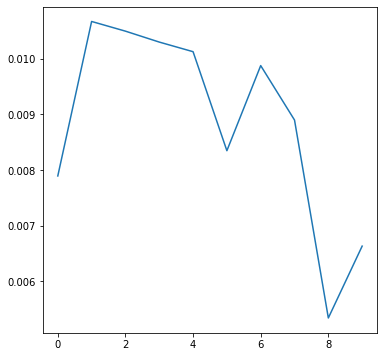

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(loss_list[1:])
plt.show()

In [ ]:
abae.summary()

Model: "model__1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  multiple                  699800    
_________________________________________________________________
attention_1 (Attention)      multiple                  10000     
_________________________________________________________________
dim_reduction_layer (Dense)  multiple                  1010      
_________________________________________________________________
final_dense (Dense)          multiple                  1100      
Total params: 711,910
Trainable params: 711,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in abae.weights:
  print(i.name, i.shape)

model__1/embedding_layer/embeddings:0 (6998, 100)
Variable:0 (100, 100)
model__1/dim_reduction_layer/kernel:0 (100, 10)
model__1/dim_reduction_layer/bias:0 (10,)
model__1/final_dense/kernel:0 (10, 100)
model__1/final_dense/bias:0 (100,)


In [ ]:
from gensim.models import FastText
model=FastText.load("/content/drive/My Drive/REVIEWS/trained_embeddings") #reusing already trained model

In [ ]:
!python "/content/drive/MyDrive/REVIEWS/training.py"

2021-08-16 05:21:36.256373: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!python "/content/drive/MyDrive/REVIEWS/predict.py"

2021-08-16 12:01:30.684009: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
battery back up is very good
2021-08-16 12:01:40.623134: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-16 12:01:40.636830: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-16 12:01:40.636893: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (74ab1ff4eadb): /proc/driver/nvidia/version does not exist
2021-08-16 1

In [ ]:
topics=inf.weights[4].numpy()  
topic_words={}
k=1
for i in range(len(topics)):
  topic_words["topic_"+str(k)]=np.argsort(model.wv.cosine_similarities(topics[i],model.wv.vectors))[::-1][0:20]
  k=k+1
pd.DataFrame(topic_words).applymap(lambda x:model.wv.index2word[x])

NameError: ignored

In [ ]:
import json
topics_inf={}
topics_inf[1]="price and sale"
topics_inf[2]="processors"
topics_inf[3]="camera and pictures"
topics_inf[4]="apps and notifications"
topics_inf[5]="misspelt and positive words"
topics_inf[6]="coparision"
topics_inf[7]="physical design and experience"
topics_inf[8]="hindi word"
topics_inf[9]="delivery"
topics_inf[10]="premium phones"
with open("/content/drive/My Drive/REVIEWS/topics_inf.json","w+") as file:
  json.dump(topics_inf,file)

In [ ]:
topics=inf.weights[4].numpy()  
topic_words={}
k=1
for i in range(len(topics)):
  topic_words["topic_"+str(k)]=np.argsort(model.wv.cosine_similarities(topics[i],model.wv.vectors))[::-1][0:20]
  k=k+1
pd.DataFrame(topic_words).applymap(lambda x:model.wv.index2word[x])  

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,rs,played,cameras,notifications,nice,far,body,ke,cancel,s9
1,offer,games,depth,app,xilent,think,case,hai,deliver,obviously
2,discount,graphics,images,exit,osm,comparison,thin,liye,delivered,terms
3,discounts,runs,portrait,messages,vry,really,design,bhi,order,absolutely
4,price,almost,capture,operations,nyc,aspects,fits,h,informed,s8
5,deal,90,captures,apps,sm,actually,grip,hota,address,beast
6,discounted,heavy,daylight,application,lovly,trust,slippery,acha,promised,flagships
7,12000,playing,lens,restart,good,one,feels,ki,assured,flagship
8,999,gaming,rear,applications,nais,better,silicon,nhi,asked,barring
9,13000,pubg,wide,whatsapp,super,believe,looks,accha,customer,amazing


#### Aspects

### Restoring the training of a model from the latest checkpoint

In [ ]:
#data generating
import os
from nltk.corpus import stopwords
DATA_PATH="/content/drive/My Drive/REVIEWS/"
raw_file="reviews.pickle"
preprocessed_file="preprocessed_df.pickle"
trained_embeddings="trained_embeddings"
padded_seqfile="padded_sequences.pickle"
tokenfile="token.pickle"
train_again=True
vocabtrain_again=False
stopword=stopwords.words(fileids="english")
embed_outputdim=100
aspects_k=10 #number of aspects
buffer_size=1024
batch_size=100
negative_samples=20
WEIGHTS_PATH="/content/drive/My Drive/abae_logs/checkpoints/abae/trainfrom/WeightsV2"
weight_path="/content/drive/My Drive/abae_logs/checkpoints/abae/trainfrom/WeightsV2/weights_epoch_12"
CHECKPOINTS_PATH="/content/drive/My Drive/REVIEWS/checkpointsV2"
lr=0.001
iterations=15
return_bestweightspath=True
lamda=0.5
MODEL_CONFIG = {'embed_outputdim': embed_outputdim,
                  'aspects_k' : aspects_k}
with open(os.path.join(DATA_PATH,"padded_sequences.pickle"),"rb") as file:
  seq_texts=pickle.load(file)
from random import seed
from random import randint

def gendata():
  seed(42)
  for i in range(0,len(seq_texts)):
    lis=[]
    lent=[]
    while len(lent)<20:
      value = randint(0, len(seq_texts)-1)
      if value==i:
        continue
      lis.append(seq_texts[value])
      lent.append(value)

    yield seq_texts[i],lis
datagen=tf.data.Dataset.from_generator(gendata, output_types=(tf.int32,tf.int32))
datagen=datagen.repeat(1).shuffle(buffer_size=1024).batch(100).prefetch(tf.data.experimental.AUTOTUNE)
import io
for i in datagen.take(1):
  k=i
test=model_(embed_outputdim,aspects_k)
_=test(i)
test.load_weights(WEIGHTS_PATH)
topics=test.weights[4].numpy()
topic_words={}
k=1
for i in range(len(topics)):
  topic_words["Aspect_"+str(k)]=np.argsort(model.wv.cosine_similarities(topics[i],model.wv.vectors))[::-1][0:30]
  k=k+1
pd.DataFrame(topic_words).applymap(lambda x:model.wv.index2word[x])

In [ ]:
WEIGHTS_PATH="/content/drive/My Drive/abae_logs/checkpoints/abae/trainfrom/WeightsV2/weights_epoch_12"

In [ ]:
import io
for i in datagen.take(1):
  k=i
test=model_(embed_outputdim,aspects_k)
_=test(i)
test.load_weights(WEIGHTS_PATH)
topics=test.weights[4].numpy()
topic_words={}
k=1
for i in range(len(topics)):
  topic_words["Aspect_"+str(k)]=np.argsort(model.wv.cosine_similarities(topics[i],model.wv.vectors))[::-1][0:30]
  k=k+1
pd.DataFrame(topic_words).applymap(lambda x:model.wv.index2word[x])

In [ ]:
#model initialisation
#abae=model_(embed_inputdim,embed_outputdim,trained_weights,aspects_k,dense,inputlength)
# optimiser
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
@tf.function
def train_step(input):
    with tf.GradientTape() as tape:
        #forward propagation
        loss = test(input)[0]
        #print(loss)

    #getting gradients
    gradients = tape.gradient(loss, test.trainable_variables)
    #applying gradients
    optimizer.apply_gradients(zip(gradients, test.trainable_variables))

    return loss, gradients
#no_iterations=1147*5          #epochs
train_loss = tf.keras.metrics.Mean(name='train_loss')


checkpoint_path = "/content/drive/My Drive/abae_logs/checkpoints/abae/trainfrom"

latest = tf.train.latest_checkpoint(checkpoint_path)
ckpt = tf.train.Checkpoint(optimizer=optimizer, model=test)
ckpt.restore(latest)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

#ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)


##check point to save
#checkpoint_path = "/content/drive/My Drive/abae_logs/checkpoints/abae/trainfrom"
#ckpt = tf.train.Checkpoint(optimizer=optimizer, model=test)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)


it=0
loss_list=[]
for k in range(0,10):
  counter = 0
  for input in datagen:

      loss_, gradients = train_step(input)
      #adding loss to train loss
      train_loss(loss_)
      counter = counter + 1
      template = '''Done {} step, Loss: {:0.6f}'''

    
      if counter%100==0:
        print(template.format(counter, train_loss.result()))
        
  loss_list.append(train_loss.result())
  test.save_weights("/content/drive/My Drive/abae_logs/checkpoints/abae/trainfrom/weights",save_format="h5")
  ckpt_save_path  = ckpt_manager.save()
  print ('Saving checkpoint for iteration {} at {}'.format(k+1, ckpt_save_path))
  print(counter, train_loss.result())
  train_loss.reset_states()

Done 100 step, Loss: 0.001681
Done 200 step, Loss: 0.001739
Done 300 step, Loss: 0.001915
Done 400 step, Loss: 0.002092
Done 500 step, Loss: 0.002253
Done 600 step, Loss: 0.002400
Done 700 step, Loss: 0.002532
Done 800 step, Loss: 0.002652
Done 900 step, Loss: 0.002762
Done 1000 step, Loss: 0.002862
Done 1100 step, Loss: 0.002954
Done 1200 step, Loss: 0.003038
Done 1300 step, Loss: 0.003117
Done 1400 step, Loss: 0.003189
Done 1500 step, Loss: 0.003257
Done 1600 step, Loss: 0.003319
Done 1700 step, Loss: 0.003378
Done 1800 step, Loss: 0.003433
Done 1900 step, Loss: 0.003484
Done 2000 step, Loss: 0.003532
Done 2100 step, Loss: 0.003577
Done 2200 step, Loss: 0.003619
Done 2300 step, Loss: 0.003659
Done 2400 step, Loss: 0.003697
Done 2500 step, Loss: 0.003732
Done 2600 step, Loss: 0.003766
Done 2700 step, Loss: 0.003798
Done 2800 step, Loss: 0.003828
Done 2900 step, Loss: 0.003857
Done 3000 step, Loss: 0.003884
Done 3100 step, Loss: 0.003910
Done 3200 step, Loss: 0.003934
Done 3300 step, L

In [ ]:
topics=test.weights[4].numpy()
topic_words={}
k=1
for i in range(len(topics)):
  topic_words["Aspect_"+str(k)]=np.argsort(model.wv.cosine_similarities(topics[i],model.wv.vectors))[::-1][0:30]
  k=k+1
pd.DataFrame(topic_words).applymap(lambda x:model.wv.index2word[x])

,Aspect_1,Aspect_2,Aspect_3,Aspect_4,Aspect_5,Aspect_6,Aspect_7,Aspect_8,Aspect_9,Aspect_10
0,rs,played,cameras,notifications,nice,far,body,ke,cancel,s9
1,offer,games,depth,app,osm,think,thin,hai,delivered,obviously
2,discount,runs,captures,exit,xilent,comparison,fits,liye,deliver,amazing
3,discounts,playing,portrait,messages,vry,aspects,case,bhi,order,terms
4,price,gaming,images,operations,nyc,really,feels,h,informed,s8
5,deal,handles,camera,application,lovly,actually,design,hota,promised,absolutely
6,discounted,almost,wide,apps,sm,trust,handy,acha,assured,loving
7,999,heavy,rear,restart,nais,one,grip,ki,address,flagships
8,12000,graphics,capture,able,good,believe,slippery,nhi,asked,beast
9,13000,pubg,shots,applications,osom,better,looks,accha,delivery,flagship


In [ ]:
!pip install pipreqs

!pipreqs "/content/drive/My Drive/REVIEWS/"

INFO: Successfully saved requirements file in /content/drive/My Drive/REVIEWS/requirements.txt


In [ ]:
%%writefile /content/drive/MyDrive/REVIEWS/init.py
 

Overwriting /content/drive/MyDrive/REVIEWS/init.py


In [ ]:
pd.read_pickle(os.path.join(DATA_PATH,"reviews.pickle")).tail(20).values

array([['5', 'Good phone READ MORE', 'Simply awesome'],
       ['5', 'Super fast delivery. thanks you flipkart READ MORE',
        'Excellent'],
       ['5', 'Value for money, totaly amazing READ MORE',
        'Great product'],
       ['5',
        'Good product .....wroking very well.....just purchase it now!!! READ MORE',
        'Super!'],
       ['4', 'Ok ok READ MORE', 'Worth the money'],
       ['5', 'Nice READ MORE', 'Fabulous!'],
       ['5', 'Video call not supported READ MORE', 'Must buy!'],
       ['5', 'good product but no google apps READ MORE', 'Excellent'],
       ['5', 'Nice phone READ MORE', 'Worth every penny'],
       ['5', 'Nice phone READ MORE', 'Worth every penny'],
       ['4', "Google ain't working READ MORE", 'Value-for-money'],
       ['4', 'Not bad READ MORE', 'Wonderful'],
       ['4',
        'best device for Lowest price missing the google services READ MORE',
        'Pretty good'],
       ['5', 'Its good iam happy with this product READ MORE',
        '